<a href="https://colab.research.google.com/github/jonasserry/GDFT-Net/blob/master/Train_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start Up

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
root_Path = "/content/drive/My Drive/GDFT-Net"
import sys
sys.path.append(root_Path)

from Core import GDFT_Data
from Core import GDFT_Net
import numpy as np
import matplotlib.pyplot as plt


Data Version: 1.61
Net Version: 1.72


In [ ]:
import os
os.chdir('/content/drive/My Drive/GDFT-Net/')

In [ ]:
!git

## Reload

In [ ]:
from importlib import reload  
reload(GDFT_Data)
reload(GDFT_Net)

Data Version: 1.61
Net Version: 1.72


<module 'Core.GDFT_Net' from '/content/drive/My Drive/GDFT-Net/Core/GDFT_Net.py'>

# Train Networks


## Load Data

In [ ]:
dataPath = "Saved_Data/Training_Data" +"/Sets/SET5000: 64.pkl"
DS = GDFT_Data.load_Data_Set(dataPath)

In [ ]:
DS.plot_Image_at_Index(100,aspect="auto",figsize=(5, 15))

## Create or load a GDFT-Net

In [ ]:
x,y= 64,64

path_P1 = "Saved_Models/P1/" + "TESTNEW({0}x{1}).h5".format(x,y)
path_P2 =  "Saved_Models/P2/"+ "TESTNEW({0}x{1}).h5".format(x,y)

Net_Path = "Saved_Models/Saved_Nets/TESTNEW({0}x{1}).h5".format(x,y)


Net = GDFT_Net.GDFT_Net(path_P1,path_P2,((x,y)),Net_Path)
Net.set_training_params(*DS.get_Params())

Remember: Load Models


In [ ]:
x,y= 64,64
Net_Path = "/Saved_Models/Saved_Nets/TESTNEW({0}x{1}).h5".format(x,y)
Net = GDFT_Net.load_GDFT_Net(Net_Path)

In [ ]:
!pwd

/content/drive/My Drive/GDFT-Net


## Train First Pass Model

In [ ]:
Net.create_P1_Model(nN=32)

Epoch 1/5
1803/1803 [==============================] - ETA: 0s - loss: 0.1310 - accuracy: 1.6932e-08
Epoch 00001: val_loss improved from inf to 0.10665, saving model to Saved_Models/P1/TESTNEW(64x64).h5
1803/1803 [==============================] - 65s 36ms/step - loss: 0.1310 - accuracy: 1.6932e-08 - val_loss: 0.1067 - val_accuracy: 0.0000e+00
Epoch 2/5
1803/1803 [==============================] - ETA: 0s - loss: 0.1041 - accuracy: 4.3092e-06
Epoch 00002: val_loss improved from 0.10665 to 0.10356, saving model to Saved_Models/P1/TESTNEW(64x64).h5
1803/1803 [==============================] - 66s 37ms/step - loss: 0.1041 - accuracy: 4.3092e-06 - val_loss: 0.1036 - val_accuracy: 1.8353e-05
Epoch 3/5
1803/1803 [==============================] - ETA: 0s - loss: 0.1029 - accuracy: 1.8430e-05
Epoch 00003: val_loss improved from 0.10356 to 0.10195, saving model to Saved_Models/P1/TESTNEW(64x64).h5
1803/1803 [==============================] - 67s 37ms/step - loss: 0.1029 - accuracy: 1.8430e-05 

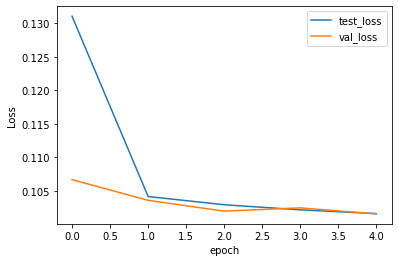

In [ ]:
Net.train_P1(DS, epochs=5,batch_size=16)

1/1 [==============================] - 0s 2ms/step - loss: 0.0839 - accuracy: 4.8828e-04


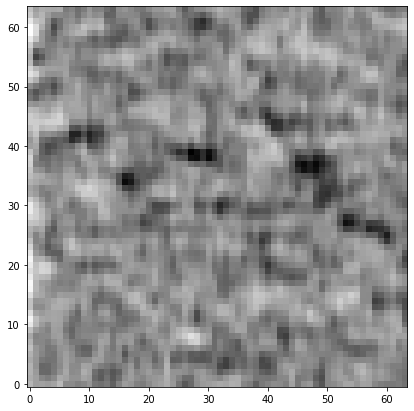

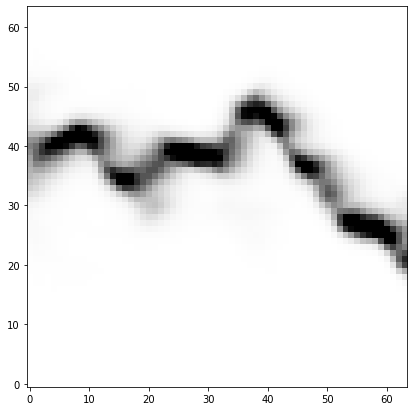

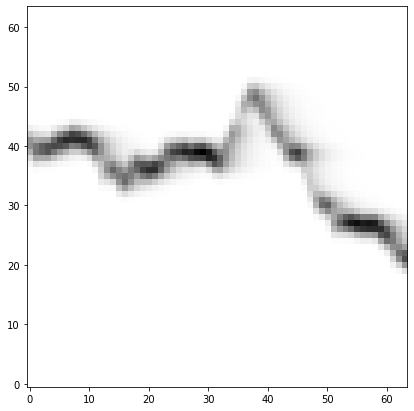

In [ ]:
Net.load_P1_Model()
Net.test_P1(SNR=1.0,fs=(7,7),aspect=1)

In [ ]:
Net.save_Net()

Saved as: Saved_Models/Saved_Nets/TESTNEW(64x64).h5
Remember to reload models


## Train Second Pass Model

In [ ]:
Net.create_P2_Model(nN=32)

In [ ]:
Net.train_P2(DS, epochs=5,batch_size=16)

1127/1127 [==============================] - 16s 15ms/step
Epoch 1/5
1802/1803 [============================>.] - ETA: 0s - loss: 0.0992 - accuracy: 0.0183
Epoch 00001: val_loss improved from inf to 0.09934, saving model to Saved_Models/P2/TESTNEW(64x64).h5
1803/1803 [==============================] - 64s 36ms/step - loss: 0.0992 - accuracy: 0.0183 - val_loss: 0.0993 - val_accuracy: 0.0136
Epoch 2/5
1803/1803 [==============================] - ETA: 0s - loss: 0.0992 - accuracy: 0.0149
Epoch 00002: val_loss did not improve from 0.09934
1803/1803 [==============================] - 63s 35ms/step - loss: 0.0992 - accuracy: 0.0149 - val_loss: 0.0993 - val_accuracy: 0.0118
Epoch 3/5
1803/1803 [==============================] - ETA: 0s - loss: 0.0992 - accuracy: 0.0166
Epoch 00003: val_loss did not improve from 0.09934
1803/1803 [==============================] - 64s 36ms/step - loss: 0.0992 - accuracy: 0.0166 - val_loss: 0.0994 - val_accuracy: 0.0304
Epoch 4/5
1803/1803 [====================

Network RMSE: 15.4 Wavelengths
Variation: 15.3 Wavelengths


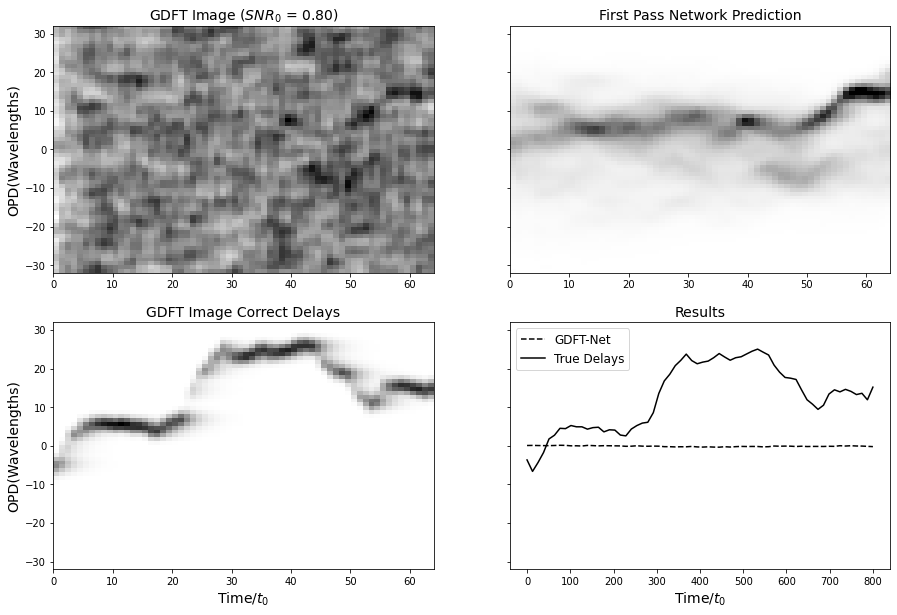

In [ ]:
Net.plot_random_Example(SNR=0.8,fs=(15,10))

In [ ]:
Net.save_Net()

Saved as: Saved_Models/Saved_Nets/TESTNEW(64x64).h5
Remember to reload models


# Investigate Net

## Plot Net

In [ ]:
!pwd

/content/drive/My Drive/GDFT-Net


In [ ]:
Net=GDFT_Net.load_GDFT_Net("Saved_Models/Saved_Nets/SET(64x64)Network.pkl")

In [ ]:
Net.load_models()

Network RMSE: 3.0 Wavelengths
Variation: 4.6 Wavelengths


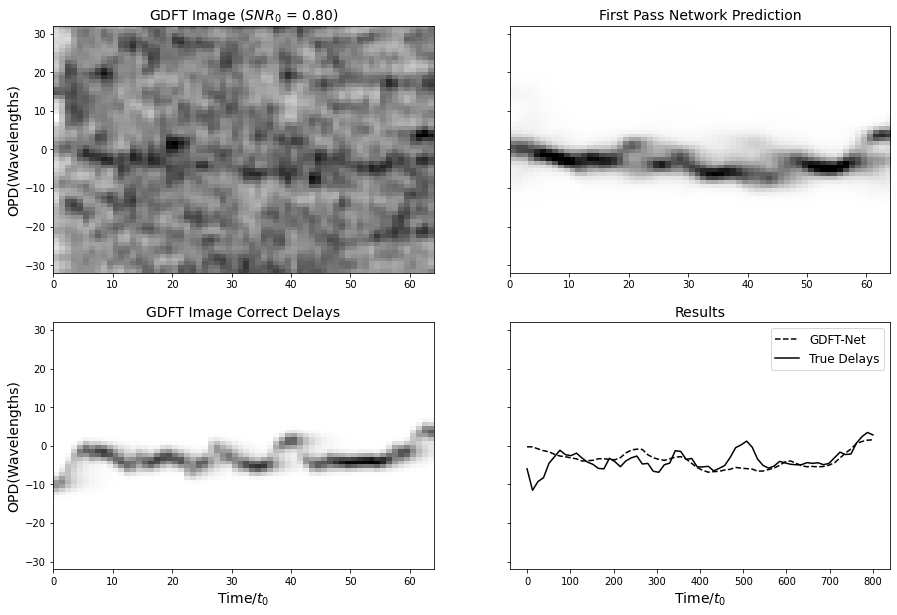

In [ ]:
Net.plot_random_Example(SNR=0.8,fs=(15,10))

## Analyse net

In [ ]:
from Core import GDFT_Tester 

In [ ]:
from importlib import reload  
reload(GDFT_Tester)

Tester Version: 1.02


<module 'Core.GDFT_Tester' from '/content/drive/My Drive/GDFT-Net/Core/GDFT_Tester.py'>

In [ ]:
Tester_Path= "Saved_Data/SET(64x64)Network.pkl"

tester=GDFT_Tester.GDFT_Net_Tester(Tester_Path,Net.path)

In [ ]:
tester.load_Net()

In [ ]:
SNRs = np.linspace(0.5,1.5,10)
n = 10
tester.run_RMSE_Testing(n,SNRs)

SNR: 0.50 RMSE: 7.23 STD: 2.80
SNR: 0.61 RMSE: 6.18 STD: 2.73
SNR: 0.72 RMSE: 5.26 STD: 3.59
SNR: 0.83 RMSE: 4.72 STD: 2.26
SNR: 0.94 RMSE: 2.98 STD: 1.19
SNR: 1.06 RMSE: 2.30 STD: 0.88
SNR: 1.17 RMSE: 1.36 STD: 0.29
SNR: 1.28 RMSE: 1.16 STD: 0.34
SNR: 1.39 RMSE: 1.14 STD: 0.26
SNR: 1.50 RMSE: 1.04 STD: 0.21


In [ ]:
tester.errors[0.50][0]

array([ 2.17760100e+00,  2.81253316e+00, -7.96320513e-01, -1.40332241e+00,
       -3.43441084e+00, -2.74491405e+00, -3.59969696e+00, -2.44674979e+00,
       -1.17456726e+00, -1.61737839e+00, -2.09467468e+00, -2.22329312e+00,
       -4.68327284e+00, -6.70183823e+00, -8.44313551e+00, -9.16466954e+00,
       -8.28395309e+00, -6.23189358e+00, -3.97891573e+00, -1.53977875e+00,
       -1.06921828e+00, -2.06625684e+00, -9.97322212e-01,  9.76715471e-01,
        2.73128603e+00,  2.22330644e+00,  1.59819282e+00,  1.52878379e+00,
        1.15006677e-01, -9.57392962e-01,  2.13483180e-01, -9.09308444e-03,
       -1.89026830e+00, -5.70594456e+00, -6.94933325e+00, -7.05915117e+00,
       -7.34605007e+00, -9.83824974e+00, -9.70557281e+00, -7.04495771e+00,
       -5.07882063e+00, -4.12180969e+00, -4.65484687e+00, -3.50552123e+00,
       -2.64714080e+00, -3.39825628e+00, -4.18286407e+00, -3.17156055e+00,
       -1.91270839e+00, -4.43761088e+00, -5.37863767e+00, -4.82735162e+00,
       -3.97899228e+00, -

In [ ]:
tester.get_RMSE_at_index(0)

IndexError: ignored

In [ ]:
tester.get_RMSE_Data_at()

In [ ]:
SNRs = np.linspace(0.1,2.0,20)
n = 500
Net.run_RMSE_Testing(n,SNRs)

SNR: 0.10 RMSE: 8.21
SNR: 0.20 RMSE: 8.71
SNR: 0.30 RMSE: 8.27
SNR: 0.40 RMSE: 8.02
SNR: 0.50 RMSE: 7.48
SNR: 0.60 RMSE: 6.69
SNR: 0.70 RMSE: 5.75
SNR: 0.80 RMSE: 4.33
SNR: 0.90 RMSE: 3.69
SNR: 1.00 RMSE: 2.46
SNR: 1.10 RMSE: 1.89
SNR: 1.20 RMSE: 1.54
SNR: 1.30 RMSE: 1.30
SNR: 1.40 RMSE: 1.14
SNR: 1.50 RMSE: 1.07
SNR: 1.60 RMSE: 0.95
SNR: 1.70 RMSE: 0.95
SNR: 1.80 RMSE: 0.93
SNR: 1.90 RMSE: 0.89
SNR: 2.00 RMSE: 0.88


In [ ]:
SNRs = np.linspace(0.1,2.0,20)
n = 300
Net.run_RMSE_Testing(n,SNRs)

SNR: 0.10 RMSE: 10.28
SNR: 0.20 RMSE: 9.98
SNR: 0.30 RMSE: 9.74
SNR: 0.40 RMSE: 9.47
SNR: 0.50 RMSE: 9.25
SNR: 0.60 RMSE: 8.21
SNR: 0.70 RMSE: 6.84
SNR: 0.80 RMSE: 5.10
SNR: 0.90 RMSE: 3.61
SNR: 1.00 RMSE: 2.59
SNR: 1.10 RMSE: 1.98
SNR: 1.20 RMSE: 1.72
SNR: 1.30 RMSE: 1.57
SNR: 1.40 RMSE: 1.51
SNR: 1.50 RMSE: 1.45
SNR: 1.60 RMSE: 1.42
SNR: 1.70 RMSE: 1.42
SNR: 1.80 RMSE: 1.41
SNR: 1.90 RMSE: 1.41
SNR: 2.00 RMSE: 1.40


In [ ]:
Net.save_Data_to_file("/content/drive/My Drive/GDFT-Net/Saved_Data/Results/Test_Data(256x64)")

In [ ]:
Net.load_Data_from_file("/content/drive/My Drive/GDFT-Net/Saved_Data/Results/Test_Data(256x64).npy")

# Rough